In [349]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom,norm,uniform
import pandas as pd
import corner
%matplotlib inline

### Normality

In models, normality arises from the acceptance that we are ignorant about the underlying process, and our only assumption is that the variance of the data is finite.

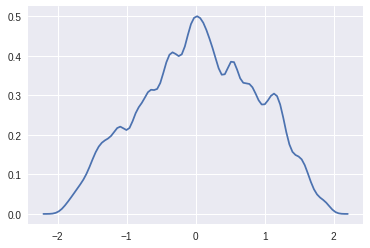

In [103]:
steps=2
nwalkers=1000

end=[(np.random.uniform(-1,1,steps)).sum() for i in range(nwalkers)]

sns.kdeplot(np.array(end),bw=0.1)

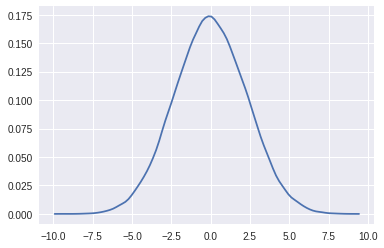

In [98]:
steps=16
nwalkers=100000
end=[(np.random.uniform(-1,1,steps)).sum() for i in range(nwalkers)]
sns.kdeplot(np.array(end),bw=0.1)

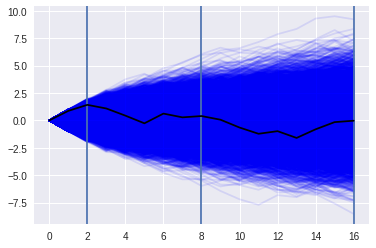

In [99]:
hist1=[]
hist2=[]
hist3=[]
stlist=[2,8,16]
for k in range(10000):
    cloc=0 #current location
    where=[0]
    for i in range(stlist[2]):
        cloc+=np.random.uniform(-1,1)
        where+=[cloc]
        if i==stlist[0]-1:
            hist1+=[cloc]
        if i==stlist[1]-1:
            hist2+=[cloc]
        if i==stlist[2]-1:
            hist3+=[cloc]
    plt.plot(where,c='b',alpha=0.1)
for st in stlist:
    plt.axvline(st)
plt.plot(where,c='k')


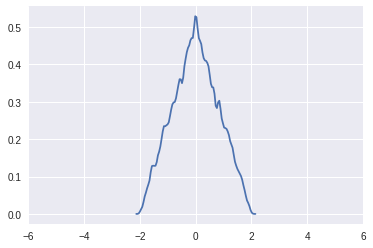

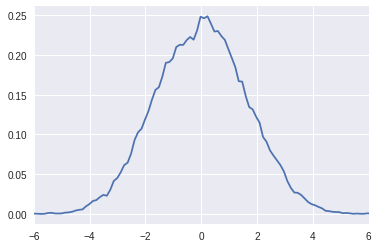

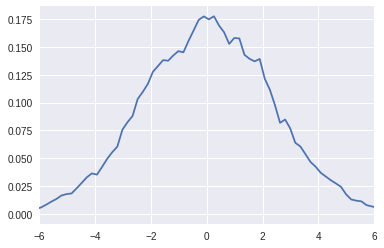

In [100]:
bw=0.05
sns.kdeplot(np.array(hist1),bw=bw)
plt.xlim(-6,6)
plt.show()
sns.kdeplot(np.array(hist2),bw=bw)
plt.xlim(-6,6)
plt.show()
sns.kdeplot(np.array(hist3),bw=bw)
plt.xlim(-6,6)
plt.show()

In [105]:
(np.random.uniform(0,0.1,12)+1).prod()

1.6951088123758122

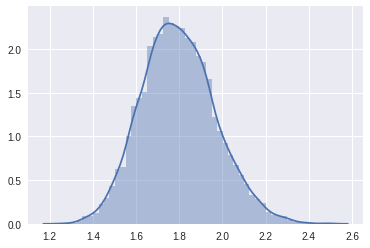

In [30]:
growth=[(np.random.uniform(0,0.1,12)+1).prod() for i in range(10000)]
sns.distplot(growth) #small effects that are multiplied together can be approximated as sums

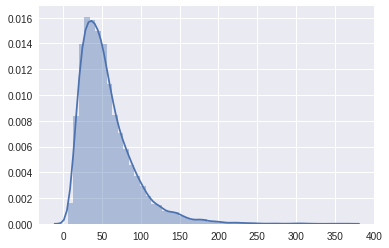

In [106]:
gbig=[(np.random.uniform(0,0.8,12)+1).prod() for i in range(10000)]
sns.distplot(gbig)

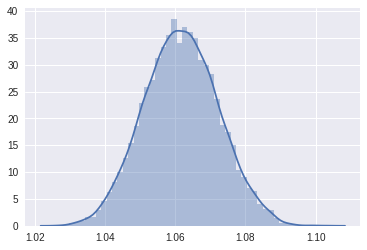

In [35]:
gsmall=[(np.random.uniform(0,0.01,12)+1).prod() for i in range(10000)]
sns.distplot(gsmall)

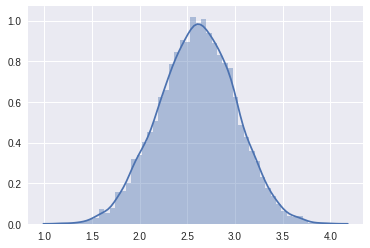

In [36]:
glog=[np.log((np.random.uniform(0,0.5,12)+1).prod()) for i in range(10000)]
sns.distplot(glog)  # normal by log-multiplication

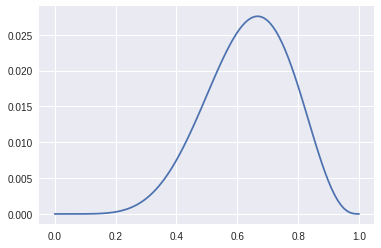

In [47]:
w=6
n=9
p_grid=np.linspace(0,1,100)
prior=1 # uniform between 0 and 1
posterior=binom.pmf(w,n,p_grid)*prior
posterior=posterior/posterior.sum()
plt.plot(p_grid,posterior)

In [51]:
url="https://raw.githubusercontent.com/rmcelreath/rethinking/master/data/Howell1.csv"
ds=pd.read_csv(url,sep=';')

In [54]:
ds.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041915,41.0,1
4,145.415,41.276872,51.0,0


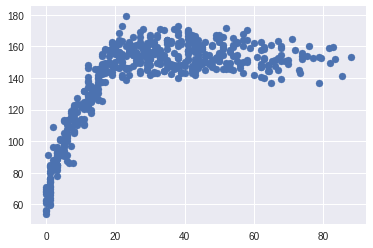

In [109]:
plt.scatter(ds.age,ds.height)

(array([  11.,   18.,   29.,   25.,   30.,   33.,   32.,  181.,  162.,   23.]),
 array([  53.975 ,   66.4845,   78.994 ,   91.5035,  104.013 ,  116.5225,
         129.032 ,  141.5415,  154.051 ,  166.5605,  179.07  ]),
 <a list of 10 Patch objects>)

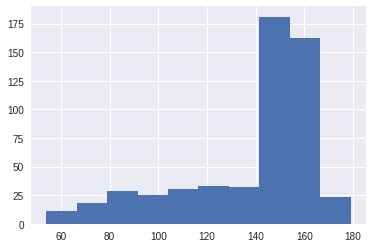

In [111]:
plt.hist(ds.height)

In [57]:
len(ds)

544

In [55]:
ds2=ds[ds.age>=18]

In [58]:
len(ds2)

352

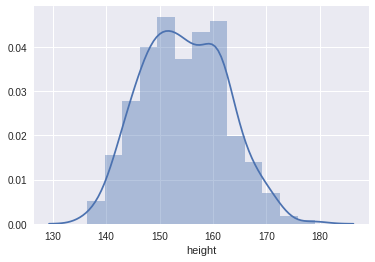

In [110]:
sns.distplot(ds2.height)

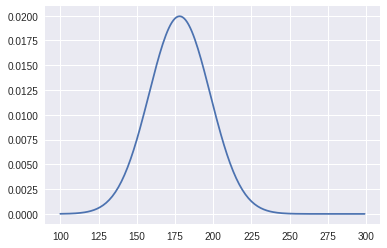

In [126]:
x=np.arange(100,300)
plt.plot(x,norm.pdf(x,178,20)) # prior on height mean

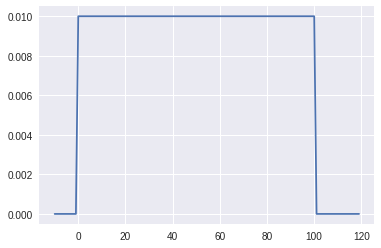

In [129]:
sx=np.arange(-10,120)
plt.plot(sx,uniform.pdf(sx,0,100)) # prior on variance of height

In [263]:
nsamp=10000
sample_sigma=np.random.uniform(50,0,nsamp)
sample_mu=np.random.normal(178,20,nsamp)

In [264]:
sample_sigma[0]

43.462674792627936

In [265]:
sample_mu[0]

156.18966375010865

In [266]:
np.random.normal(sample_mu[0],sample_sigma[0])

215.05052921975616

In [267]:
prior_h=np.random.normal(sample_mu,sample_sigma)

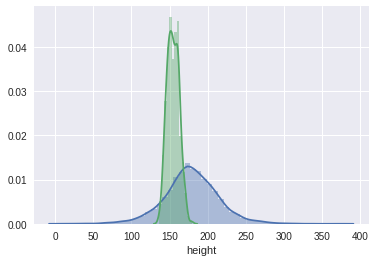

In [268]:
sns.distplot(prior_h)
sns.distplot(ds2.height)

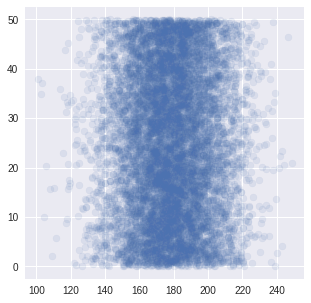

In [269]:
plt.figure(figsize=(5,5))
plt.scatter(sample_mu,sample_sigma,alpha=0.1)

In [270]:
mu_l=np.linspace(140,160,200)
sigma_l=np.linspace(4,9,200)

In [287]:
mu,sigma=np.meshgrid(mu_l, sigma_l)

In [303]:
log_like=np.sum([norm.logpdf(h,mu,sigma) for h in ds2.height],axis=0)

In [308]:
log_priors=norm.logpdf(mu,178,20)+uniform.logpdf(sigma,0,50)

In [309]:
log_post=log_like+log_priors

In [312]:
post=np.exp(log_post-log_post.max())

(7, 8.5)

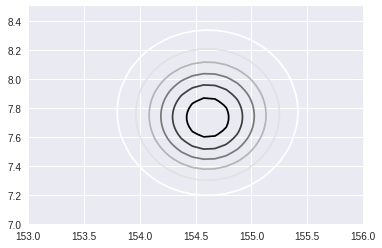

In [316]:
plt.contour(mu,sigma,post)
plt.xlim(153,156)
plt.ylim(7,8.5)

(7, 8.5)

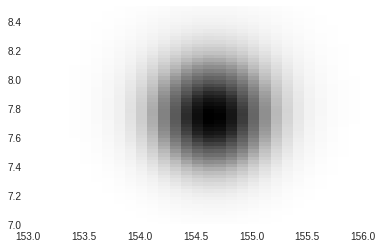

In [317]:
plt.pcolormesh(mu,sigma,post)
plt.xlim(153,156)
plt.ylim(7,8.5)

In [330]:
p=(post/post.sum()).ravel()

In [340]:
draw_idx=np.random.choice(range(len(p)),replace=True, size=10000,  p=p)

In [341]:
mu_sample=mu.ravel()[draw_idx]
sigma_sample=sigma.ravel()[draw_idx]

In [345]:
len(mu_sample)

10000

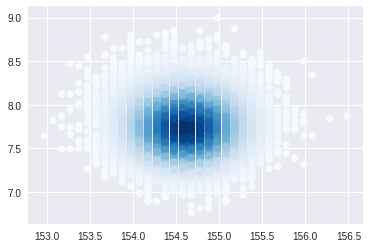

In [346]:
plt.scatter(mu_sample,sigma_sample,c=p[draw_idx],cmap='Blues')

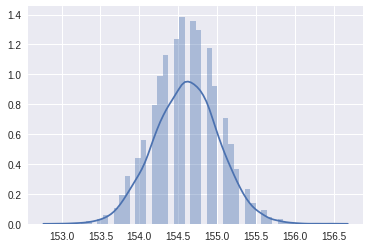

In [347]:
sns.distplot(mu_sample)

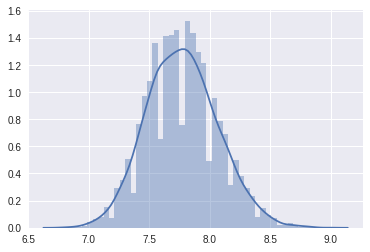

In [348]:
sns.distplot(sigma_sample)

In [373]:
np.vstack((mu_sample,sigma_sample)).T

array([[ 154.87437186,    8.12060302],
       [ 155.47738693,    7.59296482],
       [ 154.07035176,    7.71859296],
       ..., 
       [ 154.57286432,    7.44221106],
       [ 155.27638191,    7.61809045],
       [ 155.27638191,    7.54271357]])

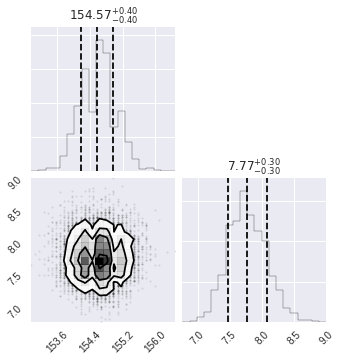

In [379]:
corner.corner(np.vstack((mu_sample,sigma_sample)).T,quantiles=[0.16, 0.5, 0.84],show_titles=True) 
plt.show()

In [367]:
def hpdi(samples,cred_mass):
    x=np.sort(samples)
    n = len(x)

    interval_idx_inc = int(np.floor(cred_mass * n))
    n_intervals = n - interval_idx_inc
    interval_width = x[interval_idx_inc:] - x[:n_intervals]

    if len(interval_width) == 0:
        raise ValueError('Too few elements for interval calculation')

    min_idx = np.argmin(interval_width)
    hdi_min = x[min_idx]
    hdi_max = x[min_idx + interval_idx_inc]
    print(hdi_min, hdi_max)
    quantiles=[hdi_min, hdi_max]
    points = sns.kdeplot(samples, shade=True,bw=0.05).get_lines()[0].get_data()

    x = points[0]
    y = points[1]

    plt.fill_between(x,y, where = (x>=quantiles[0]) & (x<=quantiles[1]), color='b')
    plt.ylabel('Sampled Posterior')
    plt.xlabel('$p$')
    plt.title('HDPI at '+str(int(cred_mass*100))+'%') 

7.46733668342 8.02010050251


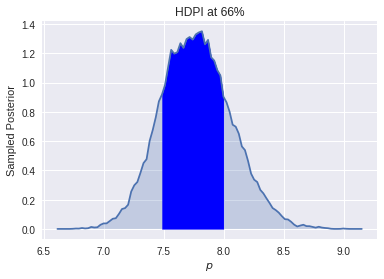

In [369]:
hpdi(sigma_sample,0.66)

154.271356784 154.974874372


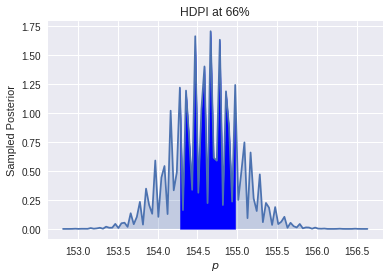

In [370]:
hpdi(mu_sample,0.66)

In [380]:
h3=np.random.choice(ds2.height,20)

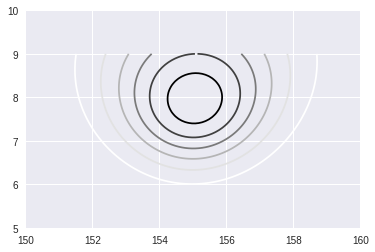

In [389]:
log_like=np.sum([norm.logpdf(h,mu,sigma) for h in h3],axis=0)
log_post=log_like+log_priors
post=np.exp(log_post-log_post.max())
plt.contour(mu,sigma,post)
plt.xlim(150,160)
plt.ylim(5,10)
plt.show()

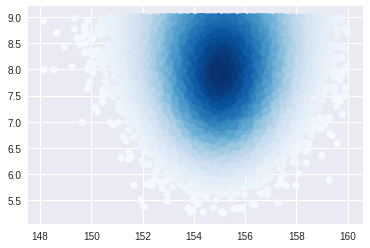

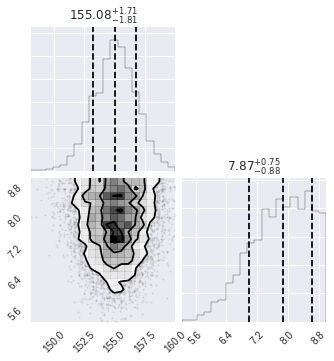

In [390]:
p=(post/post.sum()).ravel()
draw_idx=np.random.choice(range(len(p)),replace=True, size=10000,  p=p)
mu_sample=mu.ravel()[draw_idx]
sigma_sample=sigma.ravel()[draw_idx]
plt.scatter(mu_sample,sigma_sample,c=p[draw_idx],cmap='Blues')
plt.show()
corner.corner(np.vstack((mu_sample,sigma_sample)).T,quantiles=[0.16, 0.5, 0.84],show_titles=True) 
plt.show()

7.34170854271 8.84924623116


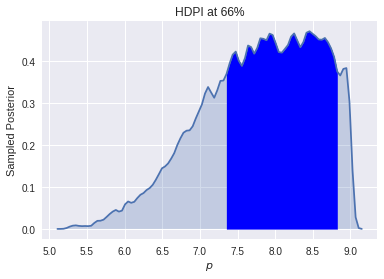

In [391]:
hpdi(sigma_sample,0.66)

In [392]:
import pymc3 as pm

In [423]:
with pm.Model() as q_model:
    mu = pm.Normal('mu', mu=178, sd=20)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    height = pm.Normal('height', mu=mu, sd=sigma, observed=ds2.height)


In [424]:
with q_model:
    wh=pm.find_MAP()
    idk=((1/pm.find_hessian(wh))**0.5)

logp = -1,235.2, ||grad|| = 11.697: 100%|██████████| 19/19 [00:00<00:00, 3217.27it/s]  


In [425]:
wh

{'mu': array(154.60702358123825),
 'sigma_interval__': array(-1.698764782121008),
 'sigma': array(7.731333025102713)}

In [426]:
idk

array([[ 0.41199399,         nan],
       [        nan,  0.04457099]])